In [1]:
from qiskit import*
from qiskit.tools.visualization import*
from numpy import*
from matplotlib.pyplot import*

In [2]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

def phi(E):
    return((1.27*m*L)/E)

m=7*10**-5 #delta m_square
L=180
E=arange(1*10**-3,15*10**-3,10**-4)
th=1.159279481 # 2*mixing angle

In [3]:
backend=BasicAer.get_backend('qasm_simulator')
acounts=[]
dcounts=[]


for e in E:
    p=phi(e)
    qc.u(th,0,0,0)
    qc.u(0,0,p,0)
    qc.u(-1*th,0,0,0)
    qc.measure(0,0)
    job=execute(qc,backend=backend,shots=100).result().get_counts()
    if '1' in job:
            dcounts.append(job['1']/100)
            acounts.append((100-job['1'])/100)
    else:
        dcounts.append(1/100)
        acounts.append(100/100)
    qc.reset(0)


In [4]:
def true_function(E):
    p= 1-(0.84*(sin(m*L/E))**2)
    return(p)
AC=true_function(E)

plot(E,AC,label='theoretical')
plot(E,dcounts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('P ee')
legend()

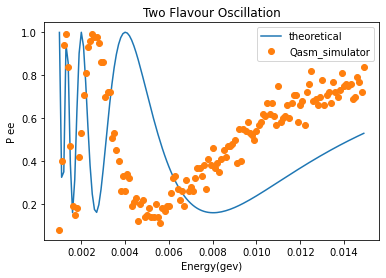

In [5]:
plot(E,AC,label='theoretical')
plot(E,acounts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(gev)')
ylabel('P ee')
legend()

In [88]:
E2=arange(1*10**-3,15*10**-3,0.5*10**-3)

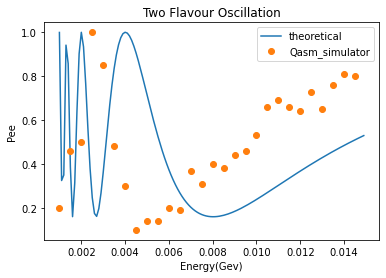

In [89]:
backend=BasicAer.get_backend('qasm_simulator')
a2counts=[]
d2counts=[]
def phi(E):
    return((1.27*m*L)/E)
P=[phi(i) for i in E2]

for phi in P:
    qc.u(th,0,0,0)
    qc.u(0,0,phi,0)
    qc.u(-1*th,0,0,0)
    qc.measure(0,0)
    job=execute(qc,backend=backend,shots=100).result().get_counts()
    if '1' in job:
            d2counts.append(job['1']/100)
            a2counts.append((100-job['1'])/100)
    else:
        d2counts.append(1/100)
        a2counts.append(100/100)
    qc.reset(0)

plot(E,AC,label='theoretical')
plot(E2,a2counts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(Gev)')
ylabel('Pee')
legend()

In [90]:
backend=BasicAer.get_backend('qasm_simulator')
a3counts=[]
d3counts=[]

In [91]:
def phi(E):
    return((1.27*m*L)/E)
P=[phi(i) for i in E2]


In [92]:
for phi in P:
    qc.u(th,0,0,0)
    qc.rz(phi,0)
    qc.u(-1*th,0,0,0)
    qc.measure(0,0)
    job=execute(qc,backend=backend,shots=1024).result().get_counts()
    if '0' in job:
            d3counts.append(job['0']/1024)
            a3counts.append((1024-job['0'])/1024)
    else:
        d3counts.append(1/1024)
        a3counts.append(1024/1024)
    qc.reset(0)

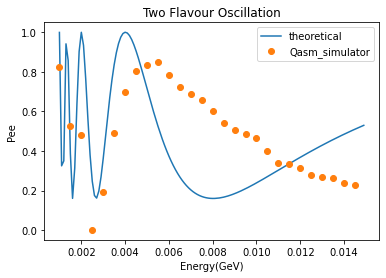

In [93]:
plot(E,AC,label='theoretical')
plot(E2,a3counts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(GeV)')
ylabel('Pee')
legend()

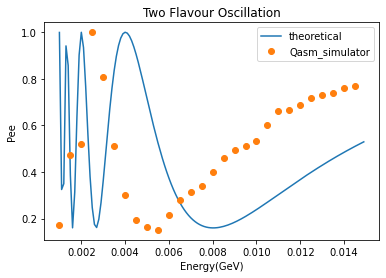

In [94]:
plot(E,AC,label='theoretical')
plot(E2,d3counts,'o',label='Qasm_simulator')
title('Two Flavour Oscillation')
xlabel('Energy(GeV)')
ylabel('Pee')
legend()

In [95]:
def true_function(E):
    p= 1-(0.84*(sin(m*L/E))**2)
    return(p)
AC2=true_function(E2)
print(AC2)
print(d3counts)

[0.99905037 0.38651499 0.99976253 0.24697669 0.36189877 0.83550755
 0.99994063 0.90573767 0.71514845 0.52531596 0.37409046 0.26852416
 0.20336147 0.16997761 0.16001484 0.16655356 0.18426662 0.20921504
 0.23856014 0.27029464 0.30302283 0.33579161 0.36796464 0.39913048
 0.42903618 0.45753956 0.48457512 0.51012978]
[0.173828125, 0.47265625, 0.5205078125, 0.9990234375, 0.8076171875, 0.51171875, 0.3017578125, 0.1953125, 0.1650390625, 0.1513671875, 0.2138671875, 0.2783203125, 0.3125, 0.3408203125, 0.3994140625, 0.4599609375, 0.4931640625, 0.513671875, 0.53515625, 0.599609375, 0.66015625, 0.6640625, 0.6875, 0.7197265625, 0.7314453125, 0.7373046875, 0.7626953125, 0.76953125]


In [96]:
diff=[p-q for p,q in zip(AC2,d3counts)]
print(diff)

[0.8252222471842747, -0.08614125671277217, 0.47925471341042203, -0.7520467510476216, -0.4457184222290079, 0.32378880210354666, 0.6981828147810344, 0.7104251689743051, 0.5501093897848836, 0.3739487689970793, 0.1602232675369063, -0.009796149312035873, -0.10913853486034164, -0.17084269828241205, -0.23939921905796346, -0.2934073768251233, -0.30889744558083654, -0.30445683255477063, -0.2965961055819537, -0.32931473552732327, -0.3571334166841632, -0.32827089222388117, -0.31953536393194026, -0.32059608027098085, -0.30240913024939464, -0.2797651303414749, -0.2781201922710965, -0.2594014713961812]
